In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("../data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
X = df.drop(columns=['math score'], axis=1)
y = df['math score']

In [4]:
# create column transformers with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_Transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_Transformer, num_features)
    ]
)

In [5]:
X = preprocessor.fit_transform(X)

In [6]:
X.shape

(1000, 19)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an evaluating function to gice all metrics for model training

In [8]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [9]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = [] 

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training set:")
    print("- rmse: {:.4f}".format(model_train_rmse))
    print("- mae: {:.4f}".format(model_train_mae))
    print("- r2_score: {:.4f}".format(model_train_r2))

    print("---------------------------------------------------------------------")

    print("Model Performance for Test set:")
    print("- rmse: {:.4f}".format(model_test_rmse))
    print("- mae: {:.4f}".format(model_test_mae))
    print("- r2_score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print("="*35)
    print("\n")

/Users/AzanAnsari/DsProjects/mlproject/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/AzanAnsari/DsProjects/mlproject/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/AzanAnsari/DsProjects/mlproject/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/AzanAnsari/DsProjects/mlproject/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/AzanAnsari/DsProjects/mlproject/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/AzanAnsari/DsProjects

Linear Regression
Model Performance for Training set:
- rmse: 5.3231
- mae: 4.2667
- r2_score: 0.8743
---------------------------------------------------------------------
Model Performance for Test set:
- rmse: 5.3940
- mae: 4.2148
- r2_score: 0.8804


Lasso
Model Performance for Training set:
- rmse: 6.5938
- mae: 5.2063
- r2_score: 0.8071
---------------------------------------------------------------------
Model Performance for Test set:
- rmse: 6.5197
- mae: 5.1579
- r2_score: 0.8253


Ridge
Model Performance for Training set:
- rmse: 5.3233
- mae: 4.2650
- r2_score: 0.8743
---------------------------------------------------------------------
Model Performance for Test set:
- rmse: 5.3904
- mae: 4.2111
- r2_score: 0.8806


K-Neighbors Regressor
Model Performance for Training set:
- rmse: 5.7079
- mae: 4.5168
- r2_score: 0.8555
---------------------------------------------------------------------
Model Performance for Test set:
- rmse: 7.2530
- mae: 5.6210
- r2_score: 0.7838


Deci

# RESULTS

In [10]:
pd.DataFrame(
    list(zip(model_list, r2_list)),
    columns=['Model Name', 'R2_Score']
).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.855089
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.848643
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.751539


# Linear Regression

In [11]:
lr_model = LinearRegression(fit_intercept=True)
lr_model = lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of model is %.2f"%score)

Accuracy of model is 88.04


/Users/AzanAnsari/DsProjects/mlproject/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/AzanAnsari/DsProjects/mlproject/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/AzanAnsari/DsProjects/mlproject/venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


# Plot y_pred and y_test

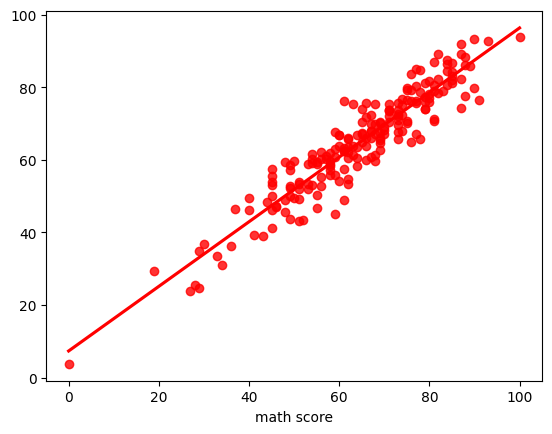

In [12]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')
plt.show()

# Difference btw actual and predicted values

In [13]:
pred_df = pd.DataFrame({'Actual value': y_test, 'Predicted Value': y_pred, "Difference": y_test-y_pred})
pred_df

,Actual value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
